# Contents

1. [Comparing Galaxy images in Different Wavelength Regimes](#Comparing-Galaxy-images-in-Different-Wavelength-Regimes)
2. [RAs, Decs, Altitudes and Azimuths](#RAs,-Decs,-Altitudes-and-Azimuths)
3. [Plotting Jet Afterglow Light Curve](#Plotting-Jet-Afterglow-Light-Curve)

# 1. Comparing Galaxy images in Different Wavelength Regimes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.visualization import make_lupton_rgb

from astropy.io import ascii

## M87 - Radio

In [2]:
m87_radio = fits.open("M87_VLASS_22.fits")
m87_radio.info()

Filename: M87_VLASS_22.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (121, 121, 1, 1)   float32   


In [3]:
m87_radio_data = m87_radio[0].data
print(m87_radio_data.shape, m87_radio_data.dtype, sep="\n")
m87_radio_data_squeezed = np.squeeze(m87_radio_data)
print(m87_radio_data_squeezed.shape)

(1, 1, 121, 121)
>f4
(121, 121)


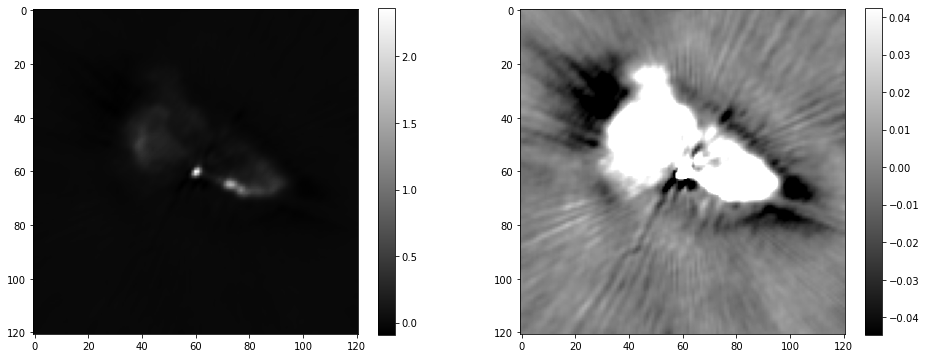

In [4]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(16)

im0 = axes[0].imshow(m87_radio_data_squeezed, cmap="gray")
plt.colorbar(im0, ax=axes[0])

mean0, median0, std0 = sigma_clipped_stats(m87_radio_data_squeezed)
im1 = axes[1].imshow(m87_radio_data_squeezed, vmin = median0 - 5*std0, vmax = median0 + 5*std0, cmap='gray')
plt.colorbar(im1, ax=axes[1])

## M87 - IR

In [5]:
m87_ir = fits.open("M87_WISE_12micrometer.fits")
print(m87_ir.info())

m87_ir_data = m87_ir[0].data
print(m87_ir_data.shape, m87_ir_data.dtype)

Filename: M87_WISE_12micrometer.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      86   (87, 87)   float32   
None
(87, 87) >f4


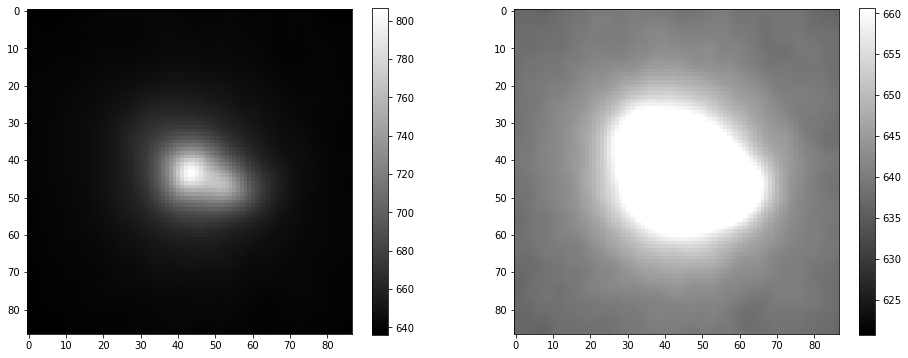

In [6]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(16)

im0 = axes[0].imshow(m87_ir_data, cmap="gray")
plt.colorbar(im0, ax=axes[0])

mean1, median1, std1 = sigma_clipped_stats(m87_ir_data)
im1 = axes[1].imshow(m87_ir_data, vmin = median1 - 5*std1, vmax = median1 + 5*std1, cmap='gray')
plt.colorbar(im1, ax=axes[1])

## M87 - Visible

In [7]:
m87_g = fits.open('./M87_SDSS_g.fits')
m87_r = fits.open('./M87_SDSS_r.fits')
m87_i = fits.open('./M87_SDSS_i.fits')
print(m87_g.info(), m87_r.info(), m87_i.info(), sep='\n')

m87_g_data = m87_g[0].data
m87_i_data = m87_i[0].data
m87_r_data = m87_r[0].data
print(m87_g_data.shape, m87_g_data.dtype)
print(m87_i_data.shape, m87_i_data.dtype)
print(m87_r_data.shape, m87_r_data.dtype)

Filename: ./M87_SDSS_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (458, 458)   float32   
Filename: ./M87_SDSS_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (458, 458)   float32   
Filename: ./M87_SDSS_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (458, 458)   float32   
None
None
None
(458, 458) >f4
(458, 458) >f4
(458, 458) >f4


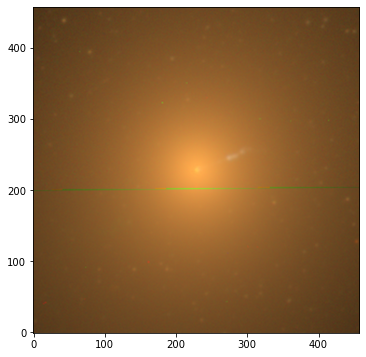

In [8]:
irg_image_m87 = make_lupton_rgb(m87_i_data, m87_r_data, m87_g_data,stretch=1.5,Q=10)

plt.figure(figsize=(6,6))
plt.imshow(irg_image_m87, origin='lower')
plt.show()

## 3C403 Radio

In [9]:
radio_3c403 = fits.open('3C403_VLASS_3_1.fits')
print(radio_3c403.info())

radio_3c403_data = radio_3c403[0].data
print(radio_3c403_data.shape)
radio_3c403_data = np.squeeze(radio_3c403_data)
print(radio_3c403_data.shape, radio_3c403_data.dtype)

Filename: 3C403_VLASS_3_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     851   (241, 241, 1, 1)   float32   
None
(1, 1, 241, 241)
(241, 241) >f4


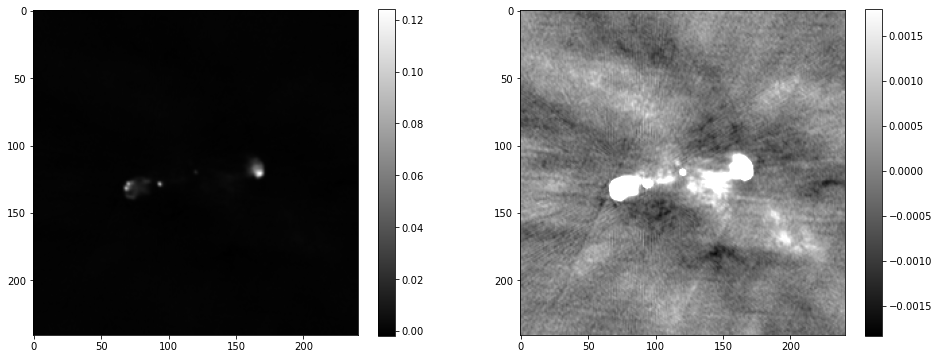

In [10]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(16)

im0 = axes[0].imshow(radio_3c403_data, cmap="gray")
plt.colorbar(im0, ax=axes[0])

mean2, median2, std2 = sigma_clipped_stats(radio_3c403_data)
im1 = axes[1].imshow(radio_3c403_data, vmin = median2 - 5*std2, vmax = median2 + 5*std2, cmap='gray')
plt.colorbar(im1, ax=axes[1])

## 3C403 IR

In [11]:
ir_3c403 = fits.open("3C403_WISE_3.4mum_5.0_arcminute.fits")
print(ir_3c403.info())

ir_3c403_data = ir_3c403[0].data
print(ir_3c403_data.shape, ir_3c403_data.dtype)

Filename: 3C403_WISE_3.4mum_5.0_arcminute.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      82   (436, 436)   float32   
None
(436, 436) >f4


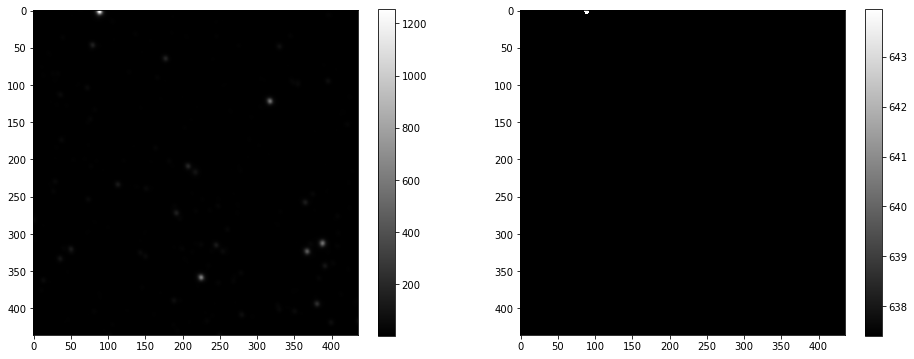

In [12]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(16)

im0 = axes[0].imshow(ir_3c403_data, cmap="gray")
plt.colorbar(im0, ax=axes[0])

mean3, median3, std3 = sigma_clipped_stats(ir_3c403_data)
im1 = axes[1].imshow(ir_3c403_data, vmin = median1 - 5*std3, vmax = median1 + 5*std3, cmap='gray')
plt.colorbar(im1, ax=axes[1])

## 3C403 Visible

In [13]:
g_3c403 = fits.open('./3C403_PanSTARRS_g.fits')
r_3c403 = fits.open('./3C403_PanSTARRS_r.fits')
i_3c403 = fits.open('./3C403_PanSTARRS_i.fits')
print(g_3c403.info(), r_3c403.info(), i_3c403.info(), sep='\n')

g_3c403_data = g_3c403[0].data
i_3c403_data = i_3c403[0].data
r_3c403_data = r_3c403[0].data
print(g_3c403_data.shape, g_3c403_data.dtype)
print(r_3c403_data.shape, r_3c403_data.dtype)
print(i_3c403_data.shape, i_3c403_data.dtype)

Filename: ./3C403_PanSTARRS_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     284   (960, 959)   float32   
Filename: ./3C403_PanSTARRS_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     274   (960, 959)   float32   
Filename: ./3C403_PanSTARRS_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     274   (960, 959)   float32   
None
None
None
(959, 960) >f4
(959, 960) >f4
(959, 960) >f4


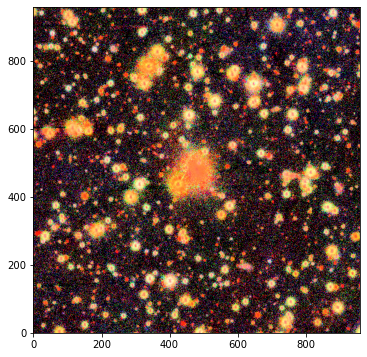

In [14]:
irg_image_3c403 = make_lupton_rgb(i_3c403_data, r_3c403_data, g_3c403_data,stretch=1.5,Q=10)

plt.figure(figsize=(6,6))
plt.imshow(irg_image_3c403, origin='lower')

## UGC595 Radio

In [15]:
radio_ugc595 = fits.open('UGC595_VLASS_31.fits')
print(radio_ugc595.info())

radio_ugc595_data = radio_ugc595[0].data
print(radio_ugc595_data.shape)
radio_ugc595_data = np.squeeze(radio_ugc595_data)
print(radio_ugc595_data.shape, radio_ugc595_data.dtype)

Filename: UGC595_VLASS_31.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     857   (361, 361, 1, 1)   float32   
None
(1, 1, 361, 361)
(361, 361) >f4


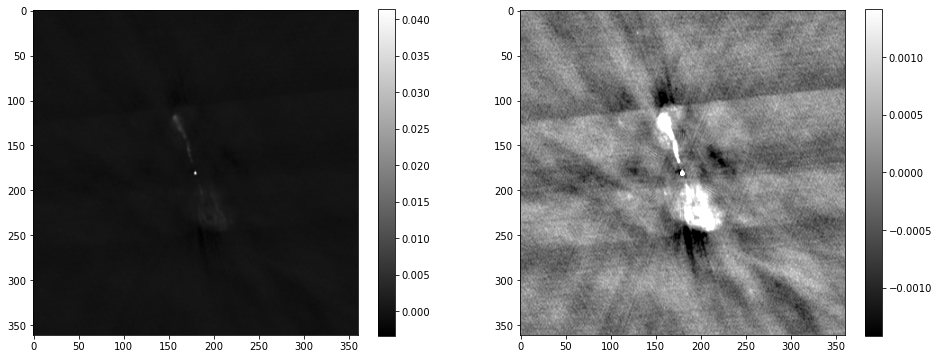

In [16]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(16)

im0 = axes[0].imshow(radio_ugc595_data, cmap="gray")
plt.colorbar(im0, ax=axes[0])

mean4, median4, std4 = sigma_clipped_stats(radio_ugc595_data)
im1 = axes[1].imshow(radio_ugc595_data, vmin = median4 - 5*std4, vmax = median4 + 5*std4, cmap='gray')
plt.colorbar(im1, ax=axes[1])

## UGC595 IR

In [17]:
ir_ugc595 = fits.open("UGC595_WISE_3.4mum.fits")
print(ir_ugc595.info())

ir_ugc595_data = ir_ugc595[0].data
print(ir_ugc595_data.shape, ir_ugc595_data.dtype)

Filename: UGC595_WISE_3.4mum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      82   (262, 262)   float32   
None
(262, 262) >f4


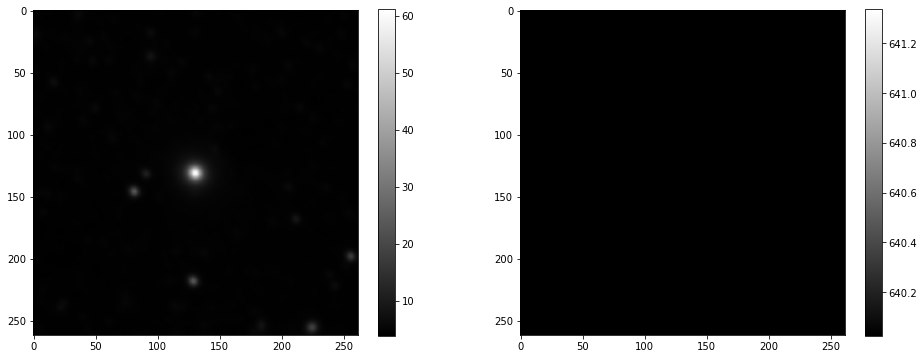

In [18]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(16)

im0 = axes[0].imshow(ir_ugc595_data, cmap="gray")
plt.colorbar(im0, ax=axes[0])

mean5, median5, std5 = sigma_clipped_stats(ir_ugc595_data)
im1 = axes[1].imshow(ir_ugc595_data, vmin = median1 - 5*std5, vmax = median1 + 5*std5, cmap='gray')
plt.colorbar(im1, ax=axes[1])

## UGC595 Visible

In [19]:
g_ugc595 = fits.open('UGC595_SDSS_g.fits')
r_ugc595 = fits.open('UGC595_SDSS_r.fits')
i_ugc595 = fits.open('UGC595_SDSS_i.fits')
print(g_ugc595.info(), r_ugc595.info(), i_ugc595.info(), sep='\n')

g_ugc595_data = g_ugc595[0].data
i_ugc595_data = i_ugc595[0].data
r_ugc595_data = r_ugc595[0].data
print(g_ugc595_data.shape, g_ugc595_data.dtype)
print(r_ugc595_data.shape, r_ugc595_data.dtype)
print(i_ugc595_data.shape, i_ugc595_data.dtype)

Filename: UGC595_SDSS_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1374, 1374)   float32   
Filename: UGC595_SDSS_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1374, 1374)   float32   
Filename: UGC595_SDSS_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1374, 1374)   float32   
None
None
None
(1374, 1374) >f4
(1374, 1374) >f4
(1374, 1374) >f4


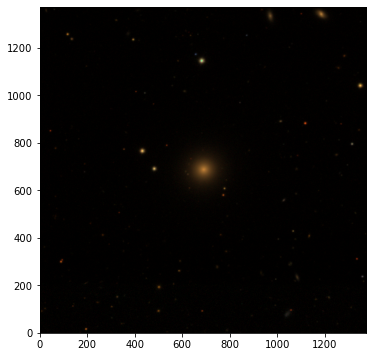

In [20]:
irg_image_ugc595 = make_lupton_rgb(i_ugc595_data, r_ugc595_data, g_ugc595_data,stretch=1.5,Q=10)

plt.figure(figsize=(6,6))
plt.imshow(irg_image_ugc595, origin='lower')

## Results

### M87

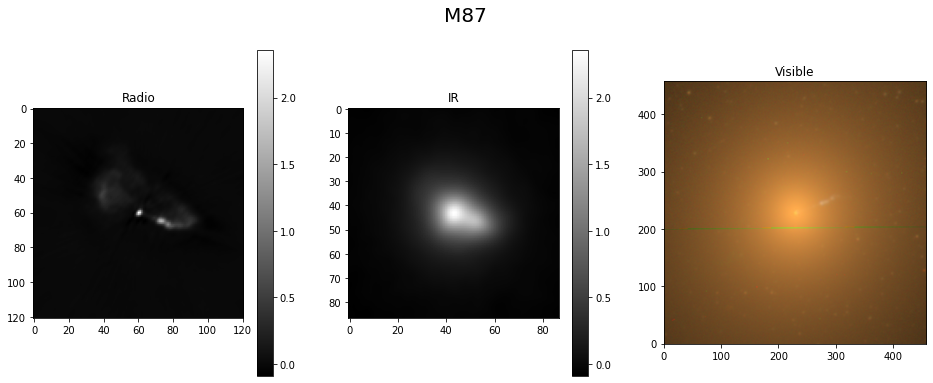

In [24]:
fig, axes = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(16)

fig.suptitle('M87', fontsize=20)
im0 = axes[0].imshow(m87_radio_data_squeezed, cmap="gray")
plt.colorbar(im0, ax=axes[0])
axes[0].set_title('Radio')

im1 = axes[1].imshow(m87_ir_data, cmap="gray")
plt.colorbar(im0, ax=axes[1])
axes[1].title.set_text('IR')

im3 = axes[2].imshow(irg_image_m87, origin='lower')
axes[2].set_title('Visible')

plt.savefig('m87_all.jpg')

Radio image of m87 highlights a jet of gases or other emmission from the core of the galaxy. While the IR and visible wavelength images have their brightest spots near the centers, the IR one is more diffused than the visible one indicating that there are some kind of objects in the galaxy which can act as a continnum of ir source, while thats not the case with visible image. 

### 3C403

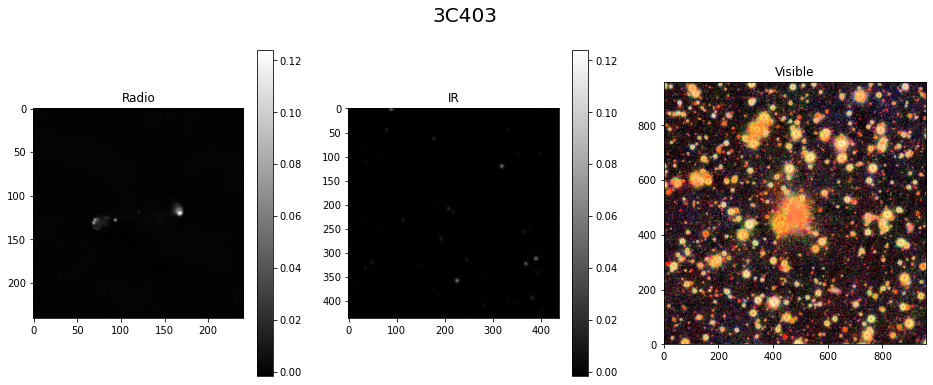

In [23]:
fig, axes = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(16)

fig.suptitle('3C403', fontsize=20)
im0 = axes[0].imshow(radio_3c403_data, cmap="gray")
plt.colorbar(im0, ax=axes[0])
axes[0].set_title('Radio')

im1 = axes[1].imshow(ir_3c403_data, cmap="gray")
plt.colorbar(im0, ax=axes[1])
axes[1].title.set_text('IR')

im3 = axes[2].imshow(irg_image_3c403, origin='lower')
axes[2].set_title('Visible')
plt.savefig('3c403_all.jpg')

Radio image similar to above one reveals a cloud of gases like a remnant of supernova explosion (actually its a water megamaser) and this cloud of gases has no correlation to the stars we observe optically. The IR image reveals that few point sources among the bunch of stars seen from the visible image are capable of emitting strong IR radiation.

## UGC595

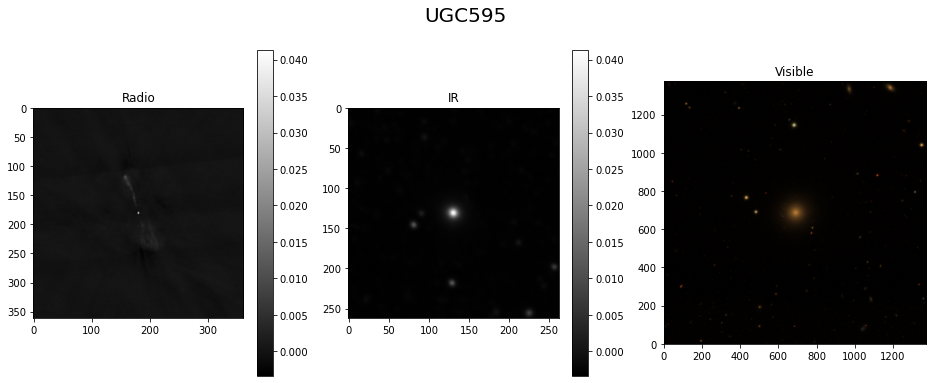

In [25]:
fig, axes = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(16)

fig.suptitle('UGC595', fontsize=20)
im0 = axes[0].imshow(radio_ugc595_data, cmap="gray")
plt.colorbar(im0, ax=axes[0])
axes[0].set_title('Radio')

im1 = axes[1].imshow(ir_ugc595_data, cmap="gray")
plt.colorbar(im0, ax=axes[1])
axes[1].title.set_text('IR')

im3 = axes[2].imshow(irg_image_ugc595, origin='lower')
axes[2].set_title('Visible')

plt.savefig('ugc595_all.jpg')

An internet search revealed that this UGC00595 is a galactic nucleus, and we observe a faint radio jet being emitted along an axis of the center of nucleii, whose proportions might indicate its small age. Some stars are visible clearly in IR while some are clearly seen in visible images each complementing other. Nevertheless the central object is a strong emitter in all three wavelengths.

# 2 RAs, Decs, Altitudes and Azimuths

$$\large Zenith Angle  = Dec\ of\ Star - Dec\ of \ observer = 90 - 19 = 71 \deg$$

$$\large Altitude = 90 - Zenith\ Angle = 90 - 71 = 19 degrees $$  
1. Altitiude of NCP = 19 deg, Azimuth = 0 deg (by defn)
2. Altitide of star on 0deg dec = 90 - (19 - 0) = 71 deg
3. Azimuth of point on C.Equator when its setting = 270 deg (West)
4. Altitude of GW = 90 - (-19 +23.3815) =  85.6185 deg
5. Can observe anything whose declinations lie between -71deg to +109 deg
6. RA and Dec of sun = 6h and 23.5 deg <br>
for GW RA 13h 09m 48.08s and Dec −23d 22m 53.3s (-23.5 deg approx)

They are 7h apart in HA, so they are far enough to observe during daytime. Since it is in the southern celestial hemisphere observing during summer can be hard.

# 2.3 Plotting Jet Afterglow Light Curve

In [2]:
ag_data = ascii.read('gw170817_afterglow_data_full.txt')
ag_data

DateUT,T,Telescope,Freq,FluxD,FluxDErr
str24,float64,str10,float64,str7,float64
2017-Aug-18.10,0.57,VLA,9700000000.0,<144,--
2017-Aug-18.1,0.6,Swift,2.41e+17,<7.8e-3,--
2017-Aug-18.21,0.68,ATCA,8500000000.0,<120,--
2017-Aug-18.21,0.68,ATCA,10500000000.0,<150,--
2017-Aug-18.2,0.7,NuSTAR,1.2e+18,<7.3e-4,--
2017-Aug-18.46,0.93,uGMRT,610000000.0,<195,--
2017-Aug-18.5,1.0,Swift,2.41e+17,<7.5e-2,--
2017-Aug-18.6,1.1,Swift,2.41e+17,<5.0e-3,--
...,...,...,...,...,...


In [3]:
ag_data_by_telescope = ag_data.group_by('Telescope')
print(ag_data_by_telescope.groups.keys)

Telescope 
----------
      ALMA
      ATCA
   Chandra
 HST/F140W
 HST/F160W
 HST/F606W
 HST/F814W
     LOFAR
   MeerKAT
    NuSTAR
     Swift
       VLA
 VLITE/VLA
XMM-Newton
   eMERLIN
     gVLBA
     uGMRT


In [4]:
# Separating VLA data from the rest
groups01 = ag_data_by_telescope.groups[11]

# other way
mask = ag_data_by_telescope.groups.keys['Telescope'] == 'VLA'
vla_data = ag_data_by_telescope.groups[mask]

print(vla_data)

         DateUT            T    Telescope      Freq     FluxD  FluxDErr
------------------------ ------ --------- ------------- ------ --------
          2017-Aug-18.10   0.57       VLA  9700000000.0   <144       --
          2017-Aug-18.97   1.44       VLA 10000000000.0  <13.8       --
          2017-Aug-19.95   2.42       VLA 15000000000.0  <17.7       --
          2017-Aug-19.95   2.43       VLA  6200000000.0    <20       --
          2017-Aug-19.95   2.43       VLA  9700000000.0    <17       --
          2017-Aug-19.95   2.43       VLA 15000000000.0    <22       --
          2017-Aug-19.97   2.44       VLA 10000000000.0  <17.1       --
          2017-Aug-19.97   2.46       VLA  6000000000.0  <21.9       --
                     ...    ...       ...           ...    ...      ...
              2018-Jun-2  289.0       VLA  3000000000.0 3.63e1      3.9
              2018-Jun-2  289.0       VLA  6000000000.0 2.70e1      2.8
              2018-Jun-7  294.0       VLA  3000000000.0 3.12e1  

In [5]:
# Separating 3GHz data from the rest
freq_group = vla_data.group_by('Freq')
freq_group_mask = freq_group.groups.keys['Freq'] == 3e+9

vla_data = freq_group.groups[freq_group_mask]
vla_data

DateUT,T,Telescope,Freq,FluxD,FluxDErr
str24,float64,str10,float64,str7,float64
2017-Aug-20.87,3.34,VLA,3000000000.0,<32,--
2017-Aug-22.88,3.35,VLA,3000000000.0,<19,--
2017-Sep-2.9,16.4,VLA,3000000000.0,1.87e1,6.3
2017-Sep-3.9,17.4,VLA,3000000000.0,1.51e1,3.9
2017-Sep-4.9,18.3,VLA,3000000000.0,1.45e1,3.7
2017-Sep-8.9,22.4,VLA,3000000000.0,2.25e1,3.4
2017-Sep-10.8,24.2,VLA,3000000000.0,2.56e1,2.9
2017-Sep-17.8,31.3,VLA,3000000000.0,3.40e1,3.6
...,...,...,...,...,...


(23,) (23,) (23,) float64 float64 float64


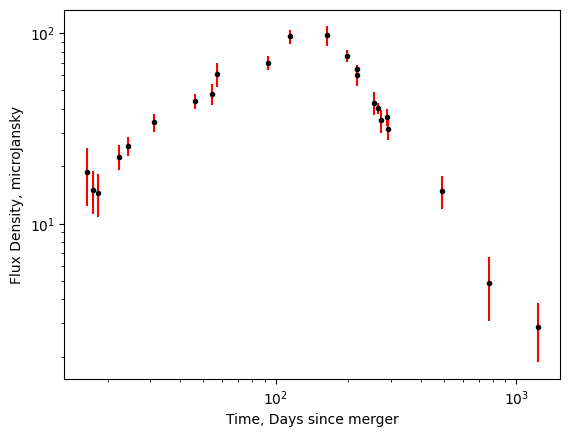

In [23]:
vla_t = np.array(vla_data['T'])
vla_errors = np.array(vla_data['FluxDErr'])

# Cleaning up flux density
# vla_fv_str = np.array(vla_data['FluxD']).tolist()
# vla_fv_str = ','.join(vla_fv_str)
# vla_fv_str = vla_fv_str.replace('<', '')

# vla_fv = np.fromstring(vla_fv_str, dtype=float, sep=',')

vla_fv = np.array(vla_data['FluxD'])
vla_fv = vla_fv[2:]
vla_fv = vla_fv.astype(float)

vla_t = vla_t[2:]
vla_errors = vla_errors[2:]

print(vla_t.shape, vla_fv.shape, vla_errors.shape, vla_t.dtype, vla_fv.dtype, vla_errors.dtype)

plt.errorbar(vla_t, vla_fv, vla_errors, ecolor='red', linestyle='', marker='.', c='black')
plt.xlabel('Time, Days since merger')
plt.ylabel('Flux Density, microJansky')
plt.xscale('log')
plt.yscale('log')
plt.savefig('vla_data.jpg', bbox_inches='tight')

In [21]:
# getting chandra data
mask_c = ag_data_by_telescope.groups.keys['Telescope'] == 'Chandra'
chandra_data = ag_data_by_telescope.groups[mask_c]

# Separating 2.41e+17 data from the rest
freq_group2 = chandra_data.group_by('Freq')
freq_group_mask2 = freq_group2.groups.keys['Freq'] == 2.41e+17

chandra_data = freq_group2.groups[freq_group_mask2]

chandra_data

DateUT,T,Telescope,Freq,FluxD,FluxDErr
str24,float64,str10,float64,str7,float64
2017-Aug-19.9,2.4,Chandra,2.41e+17,<2.3e-4,--
2017-Aug-26.7,9.2,Chandra,2.41e+17,4.48e-4,0.000131
2017-Sep-01.4,14.9,Chandra,2.41e+17,5.11e-4,9.6e-05
2017-Dec-04,109.0,Chandra,2.41e+17,2.11e-3,0.000185
2018-Jan-23,158.0,Chandra,2.41e+17,2.19e-3,0.000183
2018-May-04,259.0,Chandra,2.41e+17,1.15e-3,0.00014
2018-Aug-10,357.0,Chandra,2.41e+17,7.12e-4,0.000136
2019-Mar-22,581.0,Chandra,2.41e+17,2.63e-4,7.05e-05
2019-Aug-29,741.0,Chandra,2.41e+17,2.19e-4,7.31e-05


(10,) (10,) float64 float64


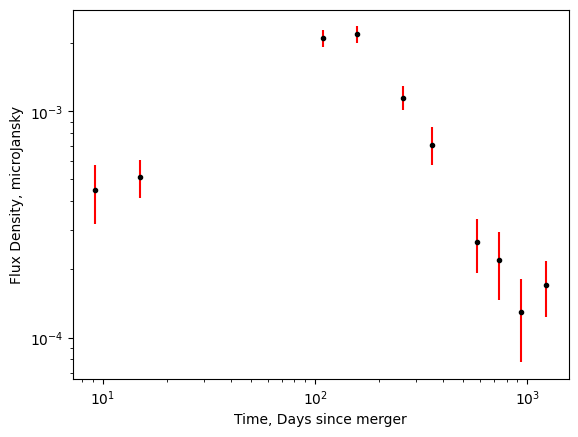

In [24]:
chandra_t = np.array(chandra_data['T'])
chandra_errors = np.array(chandra_data['FluxDErr'])

# # Cleaning up flux density - one way
# chandra_fv_str = np.array(chandra_data['FluxD']).tolist()
# chandra_fv_str = ','.join(chandra_fv_str)
# chandra_fv_str = chandra_fv_str.replace('<', '')

# chandra_fv = np.fromstring(chandra_fv_str, dtype=float, sep=',')

chandra_fv = np.array(chandra_data['FluxD'])
chandra_fv = chandra_fv[1:]
chandra_fv = chandra_fv.astype('float')

chandra_t = chandra_t[1:]
chandra_errors = chandra_errors[1:]

print(chandra_t.shape, chandra_fv.shape, chandra_t.dtype, chandra_fv.dtype)

plt.errorbar(chandra_t, chandra_fv, chandra_errors, ecolor='red', linestyle='', marker='.', c='black')
plt.xlabel('Time, Days since merger')
plt.ylabel('Flux Density, microJansky')
plt.xscale('log')
plt.yscale('log')
plt.savefig('chandra_data.jpg', bbox_inches="tight")

In [25]:
factor = (2.41e+17 / 3e+9)**0.584

fv_chandra3Ghz = chandra_fv * factor

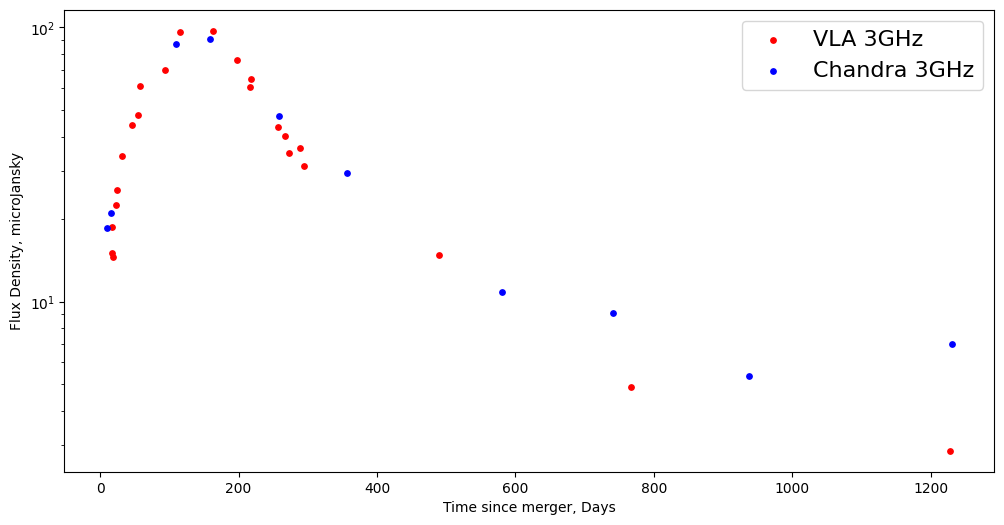

In [36]:
fig2_3 = plt.figure(figsize=(12,6))
plt.scatter(x=vla_t, y=vla_fv, c='red', s=15)
plt.scatter(x=chandra_t, y=fv_chandra3Ghz, c='blue', s=15)
# plt.errorbar(vla_t, vla_fv, vla_errors, ecolor='red', linestyle='', marker='.', c='green')
# plt.errorbar(chandra_t, fv_chandra3Ghz, chandra_errors, ecolor='blue', linestyle='', marker='.', c='orange')
plt.legend(['VLA 3GHz', 'Chandra 3GHz'], prop={'size': 16})
plt.xlabel('Time since merger, Days')
plt.ylabel('Flux Density, microJansky')
plt.yscale('log')
plt.savefig('vla_chandra_data.jpg')